# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

The second step is to import data from the given file.

In [28]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 0.0]
df1 = df.loc[df['label'] == 1.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(6000, 3)
(4000, 3)
(5000, 3)


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [29]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

It may be helpful to visualize the data.

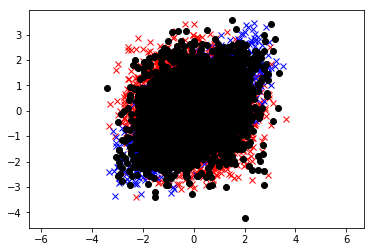

In [30]:
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData[:,0], TestData[:,1], 'o', color='k')
plt.axis('equal')
plt.show()

After creating an algorithm and generating labels, one should update the original CSV file.

In [66]:
# Idea behind the algorithm is to select the test point and take the closest 5 training points to that point.
# If there are more than 3 points in proximity, that are labeled '0', the point in question is labeled '0'.
# Else (i.e there are more than 4 points in proximity), that are labeled '1', the point in question is labeled '1'.
# In case there is a tie (3 of '0' and 2 of '1'), I pick the next closest training point (number 6), for the tie break.
# The numbers are chosen considering the split of the training data provided.

Training_Array = np.append(TrainingData0, TrainingData1, axis=0);

new_c0 = 0;
new_c1 = 0;


num_data_points = TestData.shape[0];
num_training_points = Training_Array.shape[0];
Soln_Array = np.zeros((num_data_points,3));
estimation = np.zeros((num_data_points,1));

for i in range(num_data_points):
    y0 = TestData[i,0];
    y1 = TestData[i,1];
    Distance_Vector = np.zeros((num_training_points,2));
    B = np.zeros((6,2));
    count_0 = 0;
    count_1 = 0;
    for j in range(num_training_points):
        x0 = Training_Array[j,0];
        x1 = Training_Array[j,1];
        dist = math.sqrt((x0 - y0)**2 + (x1 - y1)**2);
        Distance_Vector[j,0] = dist;
        Distance_Vector[j,1] = Training_Array[j,2];
    A = Distance_Vector[:,0];
    min_idx = np.argpartition(A,6);
    for p in range(6):
        B[p,0] = Distance_Vector[min_idx[p],0:1];
        B[p,1] = Distance_Vector[min_idx[p],1];
    
    B.sort(axis = 0);
    
        
    for l in range(5):
        if B[l,1] == 0:
            count_0 = count_0 + 1;
        else:
            count_1 = count_1 + 1;
                    
    Soln_Array[i,0] = y0;
    Soln_Array[i,1] = y1;
    
    if count_0 > 3:
        Soln_Array[i,2] = 0;
        new_c0 = new_c0 + 1;
        estimation[i] = 0;
    elif count_1 > 2:
        Soln_Array[i,2] = 1;
        new_c1 = new_c1 + 1;
        estimation[i] = 1;
    else:        # Tie Break
        Soln_Array[i,2] = B[5,1];
        if Soln_Array[i,2] == 0:
            estimation[i] = 0;
            new_c0 = new_c0 + 1;
        else:
            estimation[i] = 1;
            new_c1 = new_c1 + 1;
    
    
Temp_Data_Array = np.append(TestData,estimation,axis=1);
Array = np.append(Training_Array,Temp_Data_Array,axis=0);
print ("Label0: , Label1: ", new_c0, new_c1);



            
    



    
    
    
    


('Label0: , Label1: ', 2564, 2436)


In [67]:
dfupdate = pd.DataFrame({'Y0':Array[:,0],'Y1':Array[:,1],'label':Array[:,2]});
dfupdate.to_csv("1challenge.csv")